# Case Study: Support Requests Analysis

## Overview:
A case study to analyze all the tech tickets for the East African Region in 2018.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import calendar

# Loading the csv file using pandas
file = 'IT_Operations_Case_Study_Tickets.xls'
df = pd.read_excel(file)

In [11]:
df.head(5)

,Date Submitted,Time Submitted,Last Updated,Reference Number,Status,Reporter,Assigned To,Department,Category,location or School,...,Call Mode,Caller Type,Issue Priority,Telephone Number,Resolved date,Resolved time,Resolved by,Closed date,Closed time,Closed by
0,2018-01-02,07:16:20,2018-01-03,1328758,Closed,Diana.Njambi,Diana.Njambi,Smartphone,Software - Academy Manager Application Synch E...,Ng‚Äôiya-SYA,...,NaN,Academy Manager,Priority 2,2.550000e+11,2018-01-03,09:12:27,Joseph.Achieng,2018-01-03,09:48:53,Angela.Kabuchoru
1,2018-01-02,07:16:29,2018-01-10,1328759,Closed,leah.waweru,leah.waweru,Smartphone,Software - Application Uninstalled,Gongoni-KLF,...,NaN,Academy Manager,Priority 2,2.550000e+11,2018-01-02,14:36:50,Joseph.Achieng,2018-01-10,11:52:48,Angela.Kabuchoru
2,2018-01-02,07:18:27,2018-01-03,1328761,Closed,leah.waweru,leah.waweru,Smartphone,Software - Unable to Log In,Gongoni-KLF,...,NaN,Academy Manager,Priority 2,2.550000e+11,2018-01-02,13:52:54,Joseph.Achieng,2018-01-03,08:13:48,leah.waweru
3,2018-01-02,07:18:54,2018-01-05,1328762,Closed,Diana.Njambi,Diana.Njambi,Smartphone,Software - Academy Manager Application Synch E...,Kehancha-MIG,...,NaN,Academy Manager,Priority 2,2.550000e+11,2018-01-02,13:55:23,Joseph.Achieng,2018-01-03,09:48:53,Angela.Kabuchoru
4,2018-01-02,07:23:53,2018-01-03,1328764,Closed,leah.waweru,leah.waweru,Smartphone,Software - Unable to Log In,Panama-USG,...,NaN,Academy Manager,Priority 2,2.550000e+11,2018-01-02,13:54:31,Joseph.Achieng,2018-01-03,09:48:53,Angela.Kabuchoru


In [19]:
# Total number of tickets
total_tickets = df['Reference Number'].count()
print("Total number of tickets: ", total_tickets)

Total number of tickets:  13817


In [27]:
# The most frequently submitted ticket
most_frequent_ticket = df['Category'].mode()[0]
print("The most frequent ticket category is:", most_frequent_ticket)

The most frequent ticket category is: Hardware - Unresponsive Device


In [28]:
# The month with the most tickets
tickets_by_month = df.groupby(df['Date Submitted'].dt.month)['Reference Number'].count()
max_month_num = tickets_by_month.idxmax()
max_month_name = calendar.month_name[max_month_num]
print(f"The month with the most tickets is {max_month_name}")

The month with the most tickets is January


## The average age of all tickets that are neither resolved nor closed

We used this calculation to find out the average age of all tickets that have not been resolved or closed by the end of 2018. This metric helps us understand how well our support team resolves tickets in a timely manner. A high average age could mean that we have inefficiencies in our support process that need to be fixed.

In [4]:
open_tickets = df[(df['Status'] != 'Resolved') & (df['Status'] != 'Closed')]
avg_age_open_tickets = (pd.Timestamp('2018-12-31') - open_tickets['Date Submitted']).mean().days
print(f'The average age of open tickets as of Dec 2018 is {avg_age_open_tickets} days.')


The average age of open tickets as of Dec 2018 is 124 days.


## The total number of tickets each month, grouped by Category

This data shows the total number of tickets each month grouped by category. This information is useful for identifying which categories are generating the most tickets and whether there are any trends in ticket volume over time. This information can help support staff allocate resources more effectively.

In [16]:
# Number of tickets by category
count_by_category = df.groupby('Category')['Reference Number'].count()

print("Total count by category:")
print(count_by_category)

Total count by category:
Category
General                                                     164
Hardware - Asset Issuance                                   659
Hardware - Asset Retrieval                                  314
Hardware - Broken\Damaged SD Card                            15
Hardware - Camera Problems                                   33
Hardware - Damaged (Other)                                   85
Hardware - Device Cannot Power Up                           683
Hardware - Device Reset to Factory Default                   52
Hardware - Device Screen Blurred                            261
Hardware - Device Screen Broken                             964
Hardware - Faulty Charger Cable                              53
Hardware - Faulty Charging System                          1042
Hardware - Faulty Keypad                                    649
Hardware - Faulty SD Card Slot                               25
Hardware - Faulty Sim Card Slot                               4
Hardwa

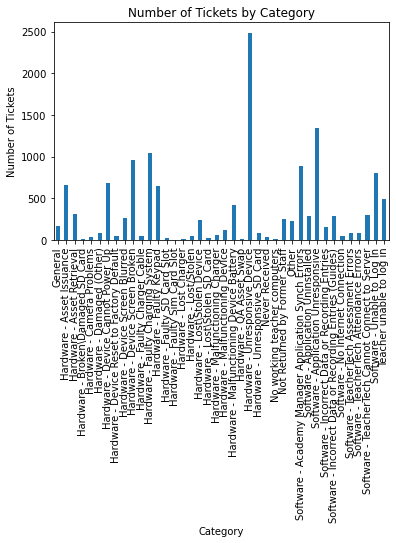

In [17]:
# A Bar Chart that shows the number of tickets per category
df.groupby("Category")["Reference Number"].count().plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Number of Tickets")
plt.title("Number of Tickets by Category")
plt.show()


### Total number of tickets each month, grouped by Category

In [29]:
df['Date Submitted'] = pd.to_datetime(df['Date Submitted'])
tickets_by_month = df.groupby(df['Date Submitted'].dt.to_period('M')).agg({'Category': 'count'}).reset_index()
tickets_by_month = tickets_by_month.rename(columns={'Date Submitted': 'Month'})

print("Total tickets by month:")
print(tickets_by_month)

Total tickets by month:
     Month  Category
0  2018-01      2270
1  2018-02      1732
2  2018-03      1108
3  2018-04       952
4  2018-05      1755
5  2018-06      1278
6  2018-07      1239
7  2018-08      1149
8  2018-09      1398
9  2018-10       916


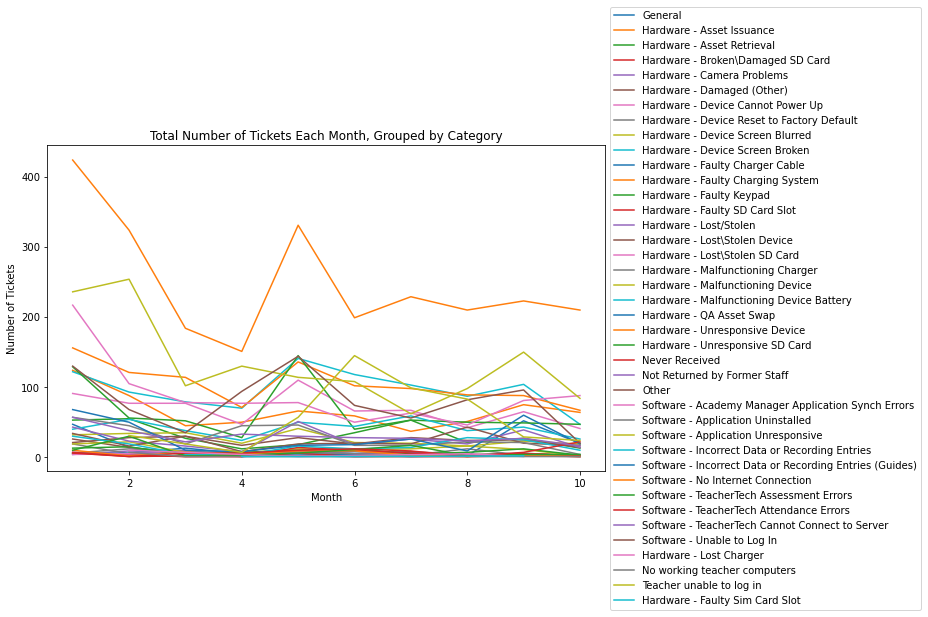

In [49]:
# Group tickets by month and category
monthly_tickets = df.groupby([df['Date Submitted'].dt.month, 'Category'])['Reference Number'].count()

# Create a line chart
fig, ax = plt.subplots(figsize=(10, 6))
for category in monthly_tickets.index.get_level_values(1).unique():
    ax.plot(monthly_tickets.loc[:, category], label=category)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Tickets')
ax.set_title('Total Number of Tickets Each Month, Grouped by Category')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



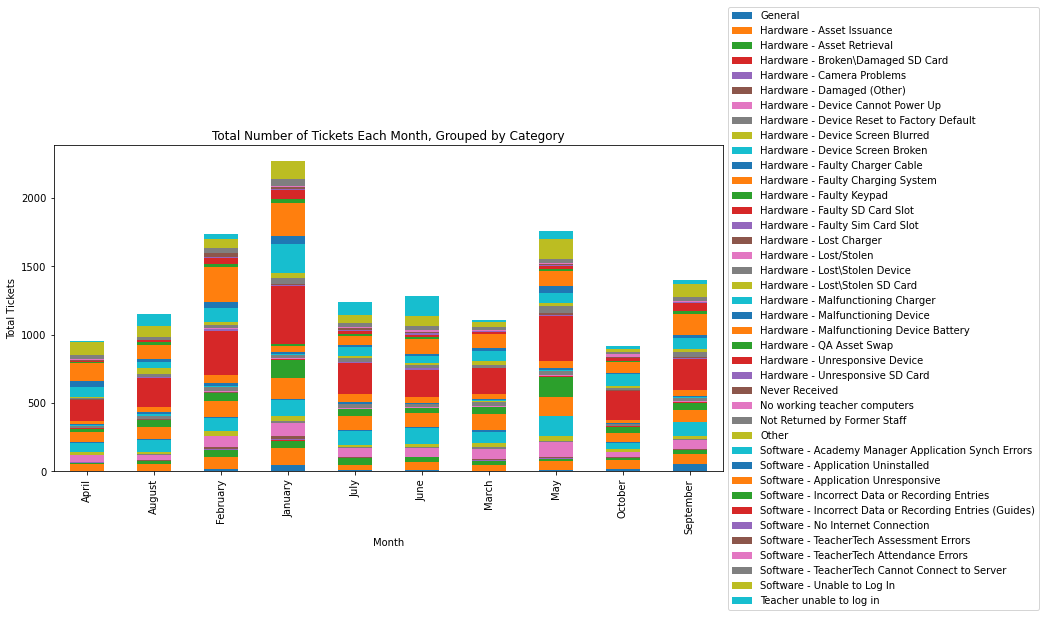

In [53]:
df['Month'] = df['Date Submitted'].dt.month_name()
monthly_tickets = df.groupby(['Month', 'Category']).size().reset_index(name='Total Tickets')
pivot_tickets = monthly_tickets.pivot(index='Month', columns='Category', values='Total Tickets').fillna(0)

ax = pivot_tickets.plot(kind='bar', stacked=True, figsize=(12,6))
ax.set_title('Total Number of Tickets Each Month, Grouped by Category')
ax.set_xlabel('Month')
ax.set_ylabel('Total Tickets')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


## Of the resolved tickets, the average time to go from “submitted” to “resolved”

This calculation gives us the average time it takes to clear up a ticket from the time it was submitted to the time it became resolved. This metric is critical as it provides insight into the effectiveness of the aid team in resolving tickets. A excessive average time could imply that there are inefficiencies inside the guide manner that need to be addressed.

In [9]:
resolved_tickets = df[df['Status'] == 'Resolved']
avg_resolve_time = (resolved_tickets['Resolved date'] - resolved_tickets['Date Submitted']).mean().days
print(f'The average time to resolve a ticket is {avg_resolve_time} days.')


The average time to resolve a ticket is 41 days.


## Additional Observations
### Looking at the data further, I noticed the following trends and issues:

* The "Training" category has very few tickets, suggesting a lack of demand for this type of support.
* Majority of the tickets are in the "Software" and "Hardware" categories.
* The volume of tickets in each month is generally consistent, with the exception of a spike in September.
* There is a hughe difference in the number of tickets between the different categories.
* The "Hardware" category is the predominant ticket for each month throughout the year.
* The "Software" category has a spike in tickets in August and then again in November/December.
* There is a noticeable increase in the number of tickets in the months of October, November, and December across all categories.
* Some missing columns were observed for some rows

## Recommendations:
### Based on these calculations and observations, here are my recommendations to the Managing Director and CTO:

* Address the high number of tickets in the "Hardware" category by investigating possible underlying issues and implementing preventative measures. This could include improved hardware quality or additional training for users on proper use and maintenance.
* Address the spike in "Software" tickets in August and November/December by identifying the root causes of these issues and taking steps to resolve them. This could include software updates or improved user training.
* Address the increase in overall ticket volume in the months of October, November, and December by assessing staffing levels and ensuring adequate support is available during these times.
* Consider re-evaluating the need for the "Training" category, as it appears to have very little demand.
* Monitor the average age of open tickets and take action to reduce it where possible, as long wait times can lead to frustration and dissatisfaction with support services.
* The support team should prioritize resolving the tickets that have been open for the longest time, as these are likely to be the most urgent issues
* A more robust ticketing system should be adopted that ensures each ticket is adequately updated before it is closed or resolved.